In [9]:
import pandas as pd 
import numpy as np

In [ ]:
# Data cleaning 
# EDA
# Text preprocessing 
# Model building 
# Evaluation 
# Improvement 
# Website
# Deploy

In [20]:
df = pd.read_csv('spam.csv', encoding="ISO-8859-1") # agar r lagene ke baad bhi nahi araaha he tab encoding wala use karo 

In [44]:
df.shape

(5572, 5)

In [21]:
df.head(8)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN


# Data Cleaning 

In [38]:
s = df.iloc[0:,2:]

In [43]:
s.iloc[:,0].isnull().sum()

5522

In [50]:
maindata = df.iloc[:,0:2]

In [59]:
maindata.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [55]:
maindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [61]:
maindata.rename(columns={'v1':'Target','v2':'Text'},inplace = True)

C:\Users\mynam\AppData\Roaming\Python\Python310\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [62]:
maindata.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [63]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [67]:
maindata["Target"] = encoder.fit_transform(maindata["Target"]) #ham ko 0 and spam ko 1

C:\Users\mynam\AppData\Local\Temp/ipykernel_13296/3080938110.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maindata["Target"] = encoder.fit_transform(maindata["Target"]) #ham ko 0 and spam ko 1


In [68]:
maindata.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [69]:
# missing values 
maindata.isnull().sum()

Target    0
Text      0
dtype: int64

In [72]:
# duplicate values
maindata.duplicated().sum()

403

In [73]:
# removing the duplicate values
maindata = maindata.drop_duplicates(keep="first")

In [74]:
maindata.shape

(5169, 2)

# EDA

In [75]:
maindata.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [76]:
maindata.Target.value_counts()

0    4516
1     653
Name: Target, dtype: int64

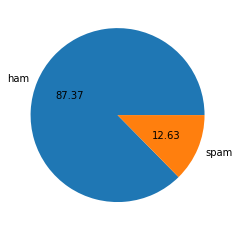

In [79]:
import matplotlib.pyplot as plt
plt.pie(maindata.Target.value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [80]:
# DAta is imbalanced 

In [81]:
import nltk

In [82]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mynam\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [ ]:
#fetching the no. of words 

In [83]:
maindata["no. of characters"] = maindata.Text.apply(len)

In [84]:
maindata.head()

,Target,Text,no. of characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [85]:
# fetch the no. of words
maindata.Text.apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: Text, Length: 5169, dtype: object